<a href="https://colab.research.google.com/github/el4701/Final-Project/blob/main/finalproject_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Final Project: Pokemon Stats

### By: Michael Torres and Erik Lapszynski

----

In [ ]:
import numpy as np   #for processing arrays
import pandas as pd  #for processing dataframes
import sqlite3 as sql  #SQL!
import matplotlib.pyplot as plt #picture making!
plt.style.use('fivethirtyeight') #A helpful style package

### Database 1

In [ ]:
pokemon1 = pd.read_csv('Pokemon.csv') 
conn = sql.connect('pokemon.db') 

try:
    pokemon1.to_sql('pokemon1', conn, index = False) #Dump the csv 
except ValueError: 
    print("""Its working""")

Its working


In [ ]:
sql_statement = """SELECT * FROM pokemon1"""

poke = pd.read_sql_query(sql_statement, conn)
poke

,pokedex,name,type_1,type_2,total,hp,attack,defense,sp._atk,sp._def,speed,generation,legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,0
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,0
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,0
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,0
4,4,Charmander,Fire,None,309,39,52,43,60,50,65,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,1
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,1
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,1
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,1


### Database 2

In [ ]:
pokemon2= pd.read_csv('pokemon-2.csv')   #Open the csv

try:
    pokemon2.to_sql('pokemon2', conn, index = False)    #Dump it into a table
except ValueError: 
    print("""Its working """)

In [ ]:
sql_statement = """SELECT * FROM pokemon2"""

poke2 = pd.read_sql_query(sql_statement, conn)
poke2

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,None,8.5,1,0
4,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,None,19.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,['Beast Boost'],0.25,1.0,0.5,2.0,0.5,1.0,2.0,0.5,1.0,...,NaN,797,107,101,61,steel,flying,999.9,7,1
797,['Beast Boost'],1.00,1.0,0.5,0.5,0.5,2.0,4.0,1.0,1.0,...,NaN,798,59,31,109,grass,steel,0.1,7,1
798,['Beast Boost'],2.00,0.5,2.0,0.5,4.0,2.0,0.5,1.0,0.5,...,NaN,799,97,53,43,dark,dragon,888.0,7,1
799,['Prism Armor'],2.00,2.0,1.0,1.0,1.0,0.5,1.0,1.0,2.0,...,NaN,800,127,89,79,psychic,None,230.0,7,1


---
## Weights and Heights of Pokemon
---

### Weights

In [ ]:
sql_statement = """SELECT p1.type_1, MAX(p2.weight_kg) AS max_weight
                   FROM pokemon1 AS p1 JOIN pokemon2 AS p2
                   ON p1.pokedex = p2.pokedex_number
                   GROUP BY type_1
                   ORDER BY type_1"""

max_weight = pd.read_sql_query(sql_statement, conn)
max_weight

,type_1,max_weight
0,Bug,200.5
1,Dark,203.0
2,Dragon,345.0
3,Electric,180.0
4,Fairy,215.0
5,Fighting,253.8
6,Fire,430.0
7,Flying,85.0
8,Ghost,750.0
9,Grass,310.0


In [ ]:
sql_statement = """SELECT p1.type_1, MIN(p2.weight_kg) AS min_weight
                   FROM pokemon1 AS p1 JOIN pokemon2 AS p2
                   ON p1.pokedex = p2.pokedex_number
                   GROUP BY type_1
                   ORDER BY type_1"""

min_weight = pd.read_sql_query(sql_statement, conn)
min_weight

,type_1,min_weight
0,Bug,0.6
1,Dark,2.1
2,Dragon,2.8
3,Electric,0.3
4,Fairy,0.1
5,Fighting,8.0
6,Fire,2.5
7,Flying,8.0
8,Ghost,0.1
9,Grass,0.5


In [ ]:
sql_statement = """SELECT p1.type_1, AVG(p2.weight_kg) AS avg_weight
                   FROM pokemon1 AS p1 JOIN pokemon2 AS p2
                   ON p1.pokedex = p2.pokedex_number
                   GROUP BY type_1
                   ORDER BY type_1"""

avg_weight = pd.read_sql_query(sql_statement, conn)
avg_weight

,type_1,avg_weight
0,Bug,30.613043
1,Dark,38.993548
2,Dragon,122.256250
3,Electric,34.472093
4,Fairy,24.923529
5,Fighting,54.022222
6,Fire,70.460000
7,Flying,54.750000
8,Ghost,72.271875
9,Grass,38.913043


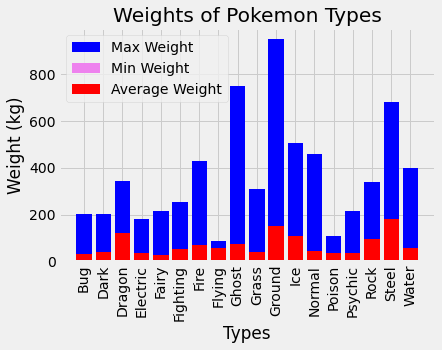

In [ ]:
plt.bar(max_weight['type_1'], max_weight['max_weight'], color = 'blue', label = 'Max Weight')
plt.bar(min_weight['type_1'], min_weight['min_weight'], color = 'violet', label = 'Min Weight')
plt.bar(avg_weight['type_1'], avg_weight['avg_weight'], color = 'red', label = 'Average Weight')
plt.ylabel('Weight (kg)')
plt.xlabel('Types')
plt.title('Weights of Pokemon Types')
plt.xticks(rotation = 90)
plt.legend();

---
### Heights
---

In [ ]:
sql_statement = """SELECT p1.type_1, MIN(p2.height_m) AS min_height
                   FROM pokemon1 AS p1 JOIN pokemon2 AS p2
                   ON p1.pokedex = p2.pokedex_number
                   GROUP BY type_1
                   ORDER BY type_1"""

min_height = pd.read_sql_query(sql_statement, conn)
min_height

,type_1,min_height
0,Bug,0.1
1,Dark,0.4
2,Dragon,0.3
3,Electric,0.2
4,Fairy,0.1
5,Fighting,0.5
6,Fire,0.4
7,Flying,0.5
8,Ghost,0.3
9,Grass,0.2


In [ ]:
sql_statement = """SELECT p1.type_1, MAX(p2.height_m) AS max_height
                   FROM pokemon1 AS p1 JOIN pokemon2 AS p2
                   ON p1.pokedex = p2.pokedex_number
                   GROUP BY type_1
                   ORDER BY type_1"""

max_height = pd.read_sql_query(sql_statement, conn)
max_height

,type_1,max_height
0,Bug,2.5
1,Dark,5.8
2,Dragon,7.0
3,Electric,2.1
4,Fairy,3.0
5,Fighting,2.3
6,Fire,3.8
7,Flying,1.5
8,Ghost,4.5
9,Grass,3.3


In [ ]:
sql_statement = """SELECT p1.type_1, AVG(p2.height_m) AS avg_height
                   FROM pokemon1 AS p1 JOIN pokemon2 AS p2
                   ON p1.pokedex = p2.pokedex_number
                   GROUP BY type_1
                   ORDER BY type_1"""

avg_height = pd.read_sql_query(sql_statement, conn)
avg_height

,type_1,avg_height
0,Bug,0.884058
1,Dark,1.135484
2,Dragon,2.181250
3,Electric,0.867442
4,Fairy,0.835294
5,Fighting,1.174074
6,Fire,1.228000
7,Flying,1.250000
8,Ghost,1.328125
9,Grass,1.000000


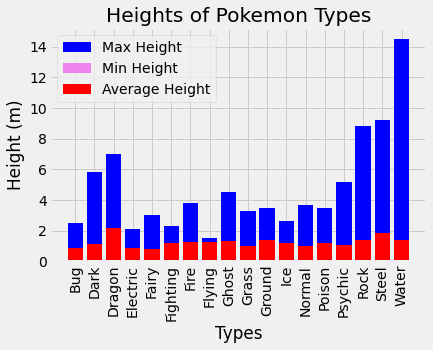

In [ ]:
plt.bar(max_height['type_1'], max_height['max_height'], color = 'blue', label = 'Max Height')
plt.bar(min_height['type_1'], min_height['min_height'], color = 'violet', label = 'Min Height')
plt.bar(avg_height['type_1'], avg_height['avg_height'], color = 'red', label = 'Average Height')
plt.ylabel('Height (m)')
plt.xlabel('Types')
plt.title('Heights of Pokemon Types')
plt.xticks(rotation = 90)
plt.legend();

---

# The Best Offense is the Best Defense

---

A scatter plot displaying the relationship between the attack and defense in generation 1, 2, and 3 Pokemon.

---
# Generation 1
---

In [ ]:
sql_statement = """SELECT * 
                   FROM pokemon1
                   WHERE generation = 1"""

gen1_pokemon = pd.read_sql_query(sql_statement, conn)
gen1_pokemon

,pokedex,name,type_1,type_2,total,hp,attack,defense,sp._atk,sp._def,speed,generation,legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,0
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,0
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,0
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,0
4,4,Charmander,Fire,None,309,39,52,43,60,50,65,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,149,Dragonite,Dragon,Flying,600,91,134,95,100,100,80,1,0
162,150,Mewtwo,Psychic,None,680,106,110,90,154,90,130,1,1
163,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,1
164,150,MewtwoMega Mewtwo Y,Psychic,None,780,106,150,70,194,120,140,1,1


In [ ]:
sql_statement = """SELECT name, attack, defense
                   FROM pokemon1
                   WHERE generation = 1 AND 
                         attack = (SELECT MAX(attack) FROM pokemon1 WHERE generation = 1)"""

maxatk_gen1_pokemon = pd.read_sql_query(sql_statement, conn)
maxatk_gen1_pokemon

,name,attack,defense
0,MewtwoMega Mewtwo X,190,100


In [ ]:
sql_statement = """SELECT name, attack, defense
                   FROM pokemon1
                   WHERE generation = 1 AND 
                         defense = (SELECT MAX(defense) FROM pokemon1 WHERE generation = 1)"""

maxdef_gen1_pokemon = pd.read_sql_query(sql_statement, conn)
maxdef_gen1_pokemon

,name,attack,defense
0,SlowbroMega Slowbro,75,180
1,Cloyster,95,180


---
### Scatter Plot
---

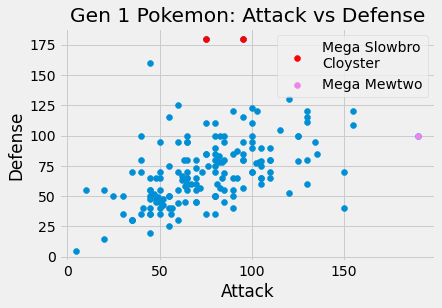

In [ ]:
plt.scatter(gen1_pokemon['attack'], gen1_pokemon['defense'])
plt.scatter(maxdef_gen1_pokemon['attack'], maxdef_gen1_pokemon['defense'], 
            color = 'red', label = "Mega Slowbro\nCloyster")
plt.scatter(maxatk_gen1_pokemon['attack'], maxatk_gen1_pokemon['defense'], 
            color = 'violet', label = "Mega Mewtwo")
plt.title("Gen 1 Pokemon: Attack vs Defense")
plt.xlabel('Attack')
plt.ylabel('Defense')
plt.legend();

-----
# Generation 3
----

In [ ]:
sql_statement = """SELECT * 
                   FROM pokemon1
                   WHERE generation = 3"""

gen3_pokemon = pd.read_sql_query(sql_statement, conn)
gen3_pokemon

,pokedex,name,type_1,type_2,total,hp,attack,defense,sp._atk,sp._def,speed,generation,legendary
0,252,Treecko,Grass,None,310,40,45,35,65,55,70,3,0
1,253,Grovyle,Grass,None,405,50,65,45,85,65,95,3,0
2,254,Sceptile,Grass,None,530,70,85,65,105,85,120,3,0
3,254,SceptileMega Sceptile,Grass,Dragon,630,70,110,75,145,85,145,3,0
4,255,Torchic,Fire,None,310,45,60,40,70,50,45,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,385,Jirachi,Steel,Psychic,600,100,100,100,100,100,100,3,1
156,386,DeoxysNormal Forme,Psychic,None,600,50,150,50,150,50,150,3,1
157,386,DeoxysAttack Forme,Psychic,None,600,50,180,20,180,20,150,3,1
158,386,DeoxysDefense Forme,Psychic,None,600,50,70,160,70,160,90,3,1


In [ ]:
sql_statement = """SELECT name, attack, defense
                   FROM pokemon1
                   WHERE generation = 3 AND 
                         attack = (SELECT MAX(attack) FROM pokemon1 WHERE generation = 3)"""

maxatk_gen3_pokemon = pd.read_sql_query(sql_statement, conn)
maxatk_gen3_pokemon

,name,attack,defense
0,GroudonPrimal Groudon,180,160
1,RayquazaMega Rayquaza,180,100
2,DeoxysAttack Forme,180,20


In [ ]:
sql_statement = """SELECT name, attack, defense
                   FROM pokemon1
                   WHERE generation = 3 AND 
                         defense = (SELECT MAX(defense) FROM pokemon1 WHERE generation = 3)"""

maxdef_gen3_pokemon = pd.read_sql_query(sql_statement, conn)
maxdef_gen3_pokemon

,name,attack,defense
0,AggronMega Aggron,140,230


---
### Scatter Plot
---

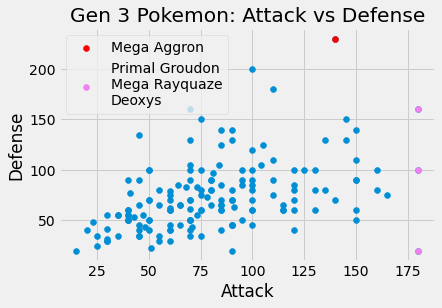

In [ ]:
plt.scatter(gen3_pokemon['attack'], gen3_pokemon['defense'])
plt.scatter(maxdef_gen3_pokemon['attack'], maxdef_gen3_pokemon['defense'], 
            color = 'red', label = "Mega Aggron")
plt.scatter(maxatk_gen3_pokemon['attack'], maxatk_gen3_pokemon['defense'], 
            color = 'violet', label = "Primal Groudon\nMega Rayquaze\nDeoxys")
plt.title("Gen 3 Pokemon: Attack vs Defense")
plt.xlabel('Attack')
plt.ylabel('Defense')
plt.legend();

---
# Generation 6
---

In [ ]:
sql_statement = """SELECT * 
                   FROM pokemon1
                   WHERE generation = 6"""

gen6_pokemon = pd.read_sql_query(sql_statement, conn)
gen6_pokemon

,pokedex,name,type_1,type_2,total,hp,attack,defense,sp._atk,sp._def,speed,generation,legendary
0,650,Chespin,Grass,None,313,56,61,65,48,45,38,6,0
1,651,Quilladin,Grass,None,405,61,78,95,56,58,57,6,0
2,652,Chesnaught,Grass,Fighting,530,88,107,122,74,75,64,6,0
3,653,Fennekin,Fire,None,307,40,45,40,62,60,60,6,0
4,654,Braixen,Fire,None,409,59,59,58,90,70,73,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,1
78,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,1
79,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,1
80,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,1


In [ ]:
sql_statement = """SELECT name, attack, defense
                   FROM pokemon1
                   WHERE generation = 6 AND 
                         attack = (SELECT MAX(attack) FROM pokemon1 WHERE generation = 6)"""

maxatk_gen6_pokemon = pd.read_sql_query(sql_statement, conn)
maxatk_gen6_pokemon

,name,attack,defense
0,DiancieMega Diancie,160,110
1,HoopaHoopa Unbound,160,60


In [ ]:
sql_statement = """SELECT name, attack, defense
                   FROM pokemon1
                   WHERE generation = 6 AND 
                         defense = (SELECT MAX(defense) FROM pokemon1 WHERE generation = 6)"""

maxdef_gen6_pokemon = pd.read_sql_query(sql_statement, conn)
maxdef_gen6_pokemon

,name,attack,defense
0,Avalugg,117,184


---
### Scatter Plot
---

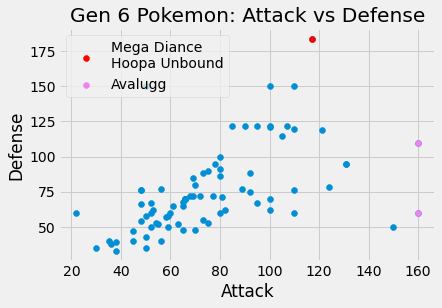

In [ ]:
plt.scatter(gen6_pokemon['attack'], gen6_pokemon['defense'])
plt.scatter(maxdef_gen6_pokemon['attack'], maxdef_gen6_pokemon['defense'], 
            color = 'red', label = "Mega Diance\nHoopa Unbound")
plt.scatter(maxatk_gen6_pokemon['attack'], maxatk_gen6_pokemon['defense'], 
            color = 'violet', label = "Avalugg")
plt.title("Gen 6 Pokemon: Attack vs Defense")
plt.xlabel('Attack')
plt.ylabel('Defense')
plt.legend();

### Correlation Between Attack and Defense Across All 3 Generations

---

In [ ]:
corr_gen1 = gen1_pokemon.corr()
corr_gen3 = gen3_pokemon.corr()
corr_gen6 = gen6_pokemon.corr()
print("Generation 1: ", corr_gen1['attack']['defense'], "\n")
print("Generation 3: ", corr_gen3['attack']['defense'], "\n")
print("Generation 6: ", corr_gen6['attack']['defense'], "\n")

Generation 1:  0.4766725196208911 

Generation 3:  0.43864656625813303 

Generation 6:  0.48459046077638573 



---

# Legendary Hit Points

---

Two histograms displaying the percentage of the amount of health every Pokemon has. One histogram shows the percentages for non-legendary Pokemon while the other shows percentages for legendary Pokemon

In [ ]:
sql_statement = """SELECT name, hp, speed
                   FROM pokemon1
                   WHERE legendary = 0
                   GROUP BY name"""

stat_pokemon = pd.read_sql_query(sql_statement, conn)
stat_pokemon

,name,hp,speed
0,Abomasnow,90,60
1,AbomasnowMega Abomasnow,90,30
2,Abra,25,90
3,Absol,65,75
4,AbsolMega Absol,65,115
...,...,...,...
730,Zigzagoon,38,60
731,Zoroark,60,105
732,Zorua,40,65
733,Zubat,40,55


In [ ]:
sql_statement = """SELECT name, hp, speed
                   FROM pokemon1
                   WHERE legendary = 1
                   GROUP BY name"""

stat_legendary_pokemon = pd.read_sql_query(sql_statement, conn)
stat_legendary_pokemon

,name,hp,speed
0,Arceus,120,120
1,Articuno,90,85
2,Azelf,75,115
3,Cobalion,91,108
4,Darkrai,70,125
...,...,...,...
60,Xerneas,126,99
61,Yveltal,126,99
62,Zapdos,90,100
63,Zekrom,100,90


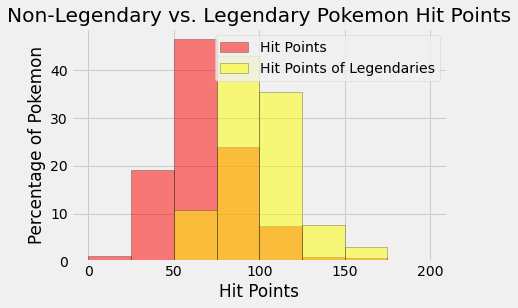

In [ ]:
num_rows = len(stat_pokemon)
multiplier = (np.ones(num_rows)/num_rows) *100
num_rows2 = len(stat_legendary_pokemon)
multiplier2 = (np.ones(num_rows2)/num_rows2) *100

plt.hist(stat_pokemon['hp'], ec = 'black', bins = np.arange(0, 201, 25), alpha = 0.5,
         weights = multiplier, label = 'Hit Points', color = 'red')
plt.hist(stat_legendary_pokemon['hp'], ec = 'black', bins = np.arange(0, 201, 25), alpha = 0.5,
         weights = multiplier2, label = 'Hit Points of Legendaries', color = 'yellow')
plt.title("Non-Legendary vs. Legendary Pokemon Hit Points")
plt.xlabel('Hit Points')
plt.ylabel('Percentage of Pokemon')
plt.legend();